# Case Study 5.2.1: Kalman Constant Velocity 2D

Instructor: Guy Bresler

Activity Type: Optional 

Case Study Description: Generate data, build the model for the motion dynamics, perform the Kalman Filtering algorithm. Kalman Filtering: Tracking the 2D Position of an Object when moving with Constant Velocity

Why this Case Study? Build your own implementation of the Kalman Filter on a simple example which can help you understand the building blocks of the GPS system.

Self-Help Documentation: In this document, we walk through some helpful tips to get you started with tracking the state of an object moving with a constant velocity using Kalman Filtering when we have noisy measurements of its velocity in 2 dimensions. In this tutorial, we provide examples and some pseudo-code for the following programming environment: Python. 

Download Self-Help Documentation

Kalman-Constant-Velocity-Case-Study-Package.zip

Time Required: The time required to do this activity varies depending on your experience in the required programming background. We suggest planning somewhere between 1 & 3 hours. Remember, this is an optional activity for participants looking for hands-on experience.

In [1]:
import numpy as np
# Numbe of Measurements
m = 100

In [4]:
# x velocity (constant)
vx = 10
# y velocity (constant)
vy= 10
# add random noise to each constant velocity measurement
mx = np.array(vx + np.random.randn(m))
my = np.array(vy + np.random.randn(m))
measurements = np.vstack((mx,my))

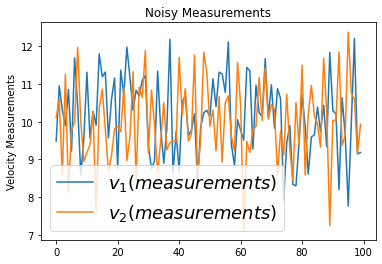

In [9]:
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.plot(range(m),mx, label='$v_1 (measurements)$') 
plt.plot(range(m),my, label='$v_2 (measurements)$') 
plt.ylabel('Velocity Measurements')
plt.title('Noisy Measurements') 
plt.legend(loc='best',prop={'size':18})
plt.show()

In [10]:
# Time Step between Filter Steps
dt = 0.1
# Identity matrix
I = np.eye(4)
# state matrix
x = np.matrix([[0.0, 0.0, 0.0, 0.0]]).T
# P matrix
P = np.diag([1000.0, 1000.0, 1000.0, 1000.0])
# A matrix
A = np.matrix([[1.0, 0.0, dt, 0.0], [0.0, 1.0, 0.0, dt],[0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]])
# H matrix
H = np.matrix([[0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]])
# R matrix
r = 100.0
R = np.matrix([[r, 0.0],
[0.0, r]])
# Q, G matrices
s = 8.8
G = np.matrix([[0.5*dt**2], [0.5*dt**2],
[dt], [dt]])
Q = G*G.T*s**2

In [12]:
# The Following variables will store the results, at each iteration
xt = [] 
yt = [] 
dxt= [] 
dyt= [] 
Zx = [] 
Zy = [] 
Px = [] 
Py = [] 
Pdx= [] 
Pdy= [] 
Rdx= [] 
Rdy= [] 
Kx = [] 
Ky = [] 
Kdx= [] 
Kdy= []

In [14]:
# Kalman Filtering Algorithm
for n in range(len(measurements[0])):
    # Prediction
    # state prediction
    x = A*x
    # error covariance prediction
    P = A*P*A.T + Q
    # Update Steps
    # Kalman Gain
    S = H*P*H.T + R
    K = (P*H.T) * np.linalg.pinv(S)
    # Update the estimate via z
    Z = measurements[:,n].reshape(2,1) 
    y = Z - (H*x)
    x = x + (K*y)
    # error covariance
    P = (I - (K*H))*P
    # Storing results
    xt.append(float(x[0])) 
    yt.append(float(x[1])) 
    dxt.append(float(x[2])) 
    dyt.append(float(x[3])) 
    Zx.append(float(Z[0])) 
    Zy.append(float(Z[1])) 
    Px.append(float(P[0,0])) 
    Py.append(float(P[1,1])) 
    Pdx.append(float(P[2,2])) 
    Pdy.append(float(P[3,3])) 
    Rdx.append(float(R[0,0])) 
    Rdy.append(float(R[1,1])) 
    Kx.append(float(K[0,0])) 
    Ky.append(float(K[1,0])) 
    Kdx.append(float(K[2,0])) 
    Kdy.append(float(K[3,0]))

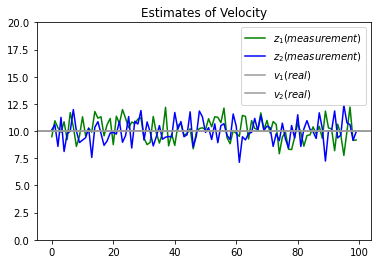

In [18]:
# Velocity Measurements
# Our estimates are in Red plt.plot(range(len(measurements[0])),dxt, label='$v_1$', c='r') plt.plot(range(len(measurements[0])),dyt, label='$v_2$', c='r')
# The noisy velocity measurements in both directions are in green and blue.
plt.plot(range(len(measurements[0])),mx, label='$z_1 (measurement)$', c='g') 
plt.plot(range(len(measurements[0])),my, label='$z_2 (measurement)$', c='b')
# The actual constant velocity for both directions are in black
plt.axhline(vx, color='#999999', label='$v_1(real)$') 
plt.axhline(vy, color='#999999', label='$v_2(real)$')
plt.title('Estimates of Velocity') 
plt.legend(loc='best') 
plt.ylim([0, 20])
plt.show()

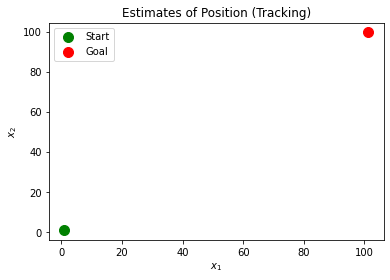

In [19]:
# Position Tracking
# Scatter plot of x and y location estimates in black # these should ideally form a straight line plt.scatter(xt,yt, s=20, label='State', c=’black’)
# starting point in green and end point in red
plt.scatter(xt[0],yt[0], s=100, label='Start', c='g') 
plt.scatter(xt[-1],yt[-1], s=100, label='Goal', c='r')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Estimates of Position (Tracking)') 
plt.legend(loc='best')
plt.show()